## Linear Regression

Generate linear-looking data with Gaussian noise

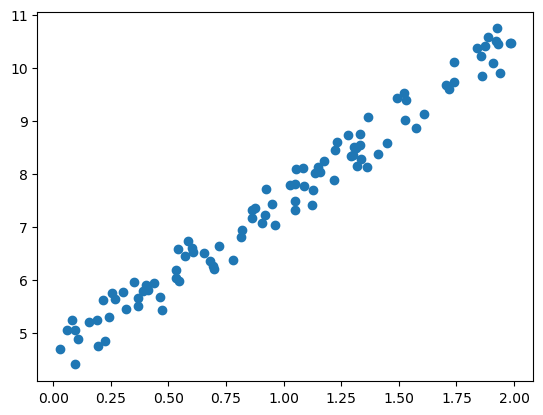

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.scatter(X, y)

Let's compute the value of theta that minimizes the MSE cost function using the <b>Normal Equation</b>

In [2]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[4.58069225]
 [2.9775987 ]]


In [3]:
X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.58069225],
       [10.53588965]])

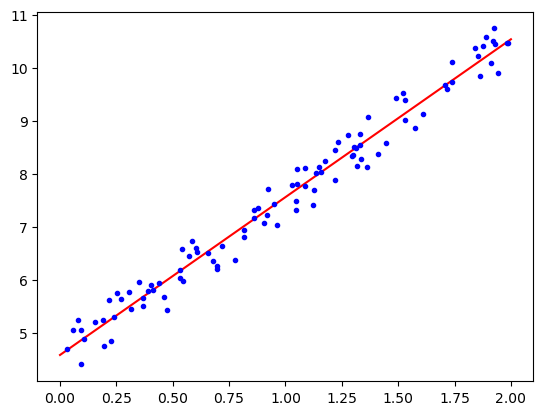

In [4]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

Performing linear regression using Scikit-Learn is quite simple

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.58069225]), array([[2.9775987]]))

In [6]:
lin_reg.predict(X_new)

array([[ 4.58069225],
       [10.53588965]])

The LinearRegression class is based on the scipy.linalg.lstsq() function, which computes the dot product of Moore-Penrose <i>pseudoinverse</i> of X with y to get the optimal theta

In [7]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.58069225],
       [2.9775987 ]])

np.linalg.pinv() can be used to compute the pseudoinverse directly

In [8]:
np.linalg.pinv(X_b).dot(y)

array([[4.58069225],
       [2.9775987 ]])

The pseudoinverse itself is computed using <b>Singular Value Decomposition</b>

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely

## Gradient Descent

In [10]:
learning_rate = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iterations in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate * gradients
print(theta)

[[4.58069225]
 [2.9775987 ]]


### Stochastic Gradient Descent

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

def learning_schedule(t):
    return t0/ (t + t1)

theta = np.random.randn(2, 1) # Random initialization

for epoch in range(n_epoches):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradie